<a href="https://colab.research.google.com/github/varunbommagunta/TreeModels/blob/main/GradientBoosting/GradientBoostingMachines_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_boston #load regression dataset

In [2]:
import numpy as np
import pandas as pd

##Regression

In [3]:
boston = load_boston()

In [4]:
dir(boston)    #contents inside load_boston

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston.DESCR)  #Description of dataprint(boston.DESCR)  #Description of data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_data = pd.DataFrame(boston.data,boston.target,columns = boston.feature_names).reset_index()

In [7]:
boston_data.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston_data.rename(columns = {'index':'target'},inplace = True) #Rename the target variable

In [9]:
boston_data.head()

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_data.isnull().sum()   #Check for any null values

target     0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [11]:
X = boston_data.iloc[:,1:]  #Features
y = boston_data.iloc[:,0]   #Targets

In [12]:
X[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = True,random_state = 42)

In [16]:
print(f"X_train Shape {X_train.shape}\ny_train Shape {y_train.shape}\nX_test Shape {X_test.shape}\ny_test Shape {y_test.shape}")

X_train Shape (404, 13)
y_train Shape (404,)
X_test Shape (102, 13)
y_test Shape (102,)


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
params = {'n_estimators': 600,            #parameter space
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [19]:
GBMR = GradientBoostingRegressor(**params)    #unpack the params dictionary

In [20]:
GBMR.fit(X_train,y_train)    #fit the model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
yhat = GBMR.predict(X_test)   #Pedict X_test

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
err = mean_squared_error(y_test,yhat)  #Measure the error

In [24]:
err

6.521791761523354

In [25]:
import matplotlib.pyplot as plt  #for plotting

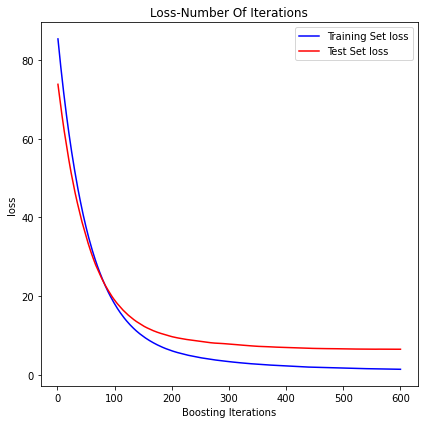

In [26]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)  #Create zero array
for i, y_pred in enumerate(GBMR.staged_predict(X_test)):     #Make staged predict because we have n trees
    test_score[i] = GBMR.loss_(y_test, y_pred)    #Store the loss

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Loss-Number Of Iterations')
plt.plot(np.arange(params['n_estimators']) + 1, GBMR.train_score_, 'b-',
         label='Training Set loss')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set loss')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('loss')
fig.tight_layout()
plt.show()

In [27]:
params['n_estimators']   

600

In [28]:
data = boston_data.sample(5)   #just check how it is performing on a single sample

In [29]:
data

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
127,16.2,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,4.0,437.0,21.2,392.11,17.19
349,26.6,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
356,17.8,8.98296,0.0,18.10,1.0,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60
339,19.0,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
498,21.2,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92


In [30]:
X = data.iloc[:,1:]

In [31]:
GBMR.predict(X) #Performing great

array([16.26489838, 26.34440009, 16.65848025, 20.17074519, 21.41187647])